In [46]:
import numpy as np
import os
from os.path import join, basename
from scipy.io import wavfile
from IPython.display import Audio

import matplotlib.pyplot as plt

import scipy.signal as sps

In [74]:
import glob
audio_list = glob.glob('/mnt/data/DCASE2019/Task1/TAU-urban-acoustic-scenes-2019-development/audio/*wav')

In [75]:
labels = ['airport', 'shopping_mall', 'metro_station', 'street_pedestrian', 'public_square', 'street_traffic', 'tram', 'bus', 'metro', 'park']

In [76]:
cities = ['amsterdam', 'barcelona', 'helsinki', 'lisbon', 'london', 'lyon', 'madrid', 'milan', 'prague', 'paris', 'stockholm', 'vienna']

In [77]:
tau_dict = {}

In [78]:
for label in labels:
    tau_dict[label] = {}
    for city in cities:
        tau_dict[label][city] = []
    for audio in audio_list:
        if label == 'metro':
            if label in audio and 'station' not in audio:
                for city in cities:
                    if city in audio:
                        tau_dict[label][city].append(basename(audio))
        else:
            if label in audio:
                for city in cities:
                    if city in audio:
                        tau_dict[label][city].append(basename(audio))

In [84]:
for label in tau_dict:
    print(label)
    s = 0
    for city in tau_dict[label]:
        #print(city, len(tau_dict[label][city]))
        print(city, len(tau_dict[label][city]))
    print(s)

airport
amsterdam 0
barcelona 128
helsinki 149
lisbon 144
london 145
lyon 144
madrid 0
milan 144
prague 144
paris 156
stockholm 158
vienna 128
0
shopping_mall
amsterdam 0
barcelona 144
helsinki 144
lisbon 144
london 144
lyon 144
madrid 0
milan 144
prague 144
paris 144
stockholm 144
vienna 144
0
metro_station
amsterdam 0
barcelona 144
helsinki 144
lisbon 144
london 144
lyon 144
madrid 0
milan 144
prague 144
paris 144
stockholm 144
vienna 144
0
street_pedestrian
amsterdam 0
barcelona 145
helsinki 145
lisbon 144
london 145
lyon 144
madrid 0
milan 144
prague 144
paris 144
stockholm 145
vienna 140
0
public_square
amsterdam 0
barcelona 144
helsinki 144
lisbon 144
london 144
lyon 144
madrid 0
milan 144
prague 144
paris 144
stockholm 144
vienna 144
0
street_traffic
amsterdam 0
barcelona 144
helsinki 144
lisbon 144
london 144
lyon 144
madrid 0
milan 144
prague 144
paris 144
stockholm 144
vienna 144
0
tram
amsterdam 0
barcelona 143
helsinki 145
lisbon 144
london 144
lyon 144
madrid 0
milan 144
p

In [106]:
train_dict = {}
eval_dict = {}

In [107]:
train_idx = 0
eval_idx = 0
for label in tau_dict:
    train_num_total = 144*9
    for city in cities:
        train_num_city = int(np.ceil(len(tau_dict[label][city]) * 0.7))
        train_num_city = min(train_num_total, train_num_city)
        train_num_total -= train_num_city
        for i in range(len(tau_dict[label][city])):
            if i < train_num_city:
                train_dict[train_idx] = tau_dict[label][city][i]
                train_idx += 1
            else:
                eval_dict[eval_idx] = tau_dict[label][city][i]
                eval_idx += 1

In [108]:
len(train_dict)

10105

In [109]:
len(eval_dict)

4295

In [110]:
tau2019_dict = {}
tau2019_dict['train'] = train_dict
tau2019_dict['eval'] = eval_dict

In [ ]:
tau2019_dict

In [112]:
import pickle as pkl

In [113]:
save_name = 'tau2019_dict_v2.pkl'
with open(save_name, 'wb') as f:
    pkl.dump(tau2019_dict, f, protocol=4)

In [94]:
import librosa

In [102]:
(audio, fs) = librosa.core.load('/mnt/data/DCASE2019/Task1/TAU-urban-acoustic-scenes-2019-development/audio/airport-barcelona-0-4-a.wav', sr=32000, mono=True)

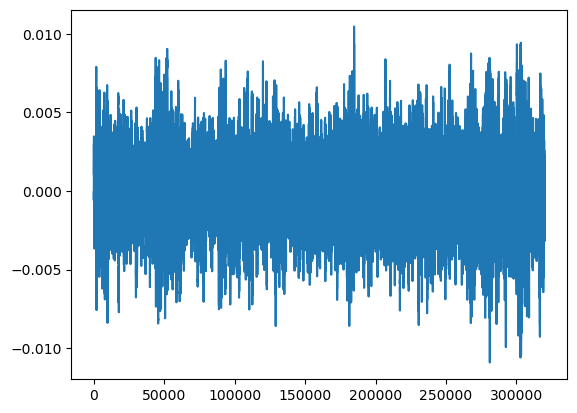

In [103]:
plt.plot(audio)
plt.show()

In [104]:
np.linalg.norm(audio)

1.3497914

In [105]:
len(audio)

320000

In [114]:
for i, label in enumerate(labels):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [115]:
import zipfile
with zipfile.ZipFile('project/ESC-10-20211025T221612Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [116]:
import jax
import jax.numpy as jnp

In [117]:
jnp.zeros(5)

DeviceArray([0., 0., 0., 0., 0.], dtype=float32)

In [119]:
jax.devices()

[GpuDevice(id=0), GpuDevice(id=1), GpuDevice(id=2), GpuDevice(id=3)]

In [ ]:
'/mnt/data/DCASE2019/Task1/TAU-urban-acoustic-scenes-2019-development/audio/'

In [2]:
import torch

In [3]:
torch.randn(10)

tensor([-1.5946, -0.6910, -0.0114, -1.0938, -1.9549, -0.3057,  1.0863, -0.3715,
         0.2078, -2.1403])

In [9]:
if torch.cuda.is_available():
    !nvidia-smi

Sat Nov  6 03:00:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.96       Driver Version: 471.96       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   49C    P8    18W / 170W |   1344MiB / 12288MiB |     15%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [128]:
device = torch.device('cuda:3')

In [5]:
import tarfile
  
# open file
file = tarfile.open('../../../Datasets/UrbanSound8K.tar.gz')
  
# extracting file
file.extractall('../../../Datasets')
  
file.close()

In [1]:
import torch

In [2]:
device = torch.device('cuda')

In [3]:
MODEL_URL = "https://github.com/descriptinc/lyrebird-wav2clip/releases/download/v0.1.0-alpha/Wav2CLIP.pt"
checkpoint = torch.hub.load_state_dict_from_url(MODEL_URL, map_location=device, progress=True)

In [3]:
import torch
import torch.nn as nn

In [5]:
mlp_list = []
        
for i in range(3 - 1):
    mlp_list.extend([nn.Linear(6, 6, bias=True), nn.ReLU()])

mlp_list.extend([nn.Linear(6, 3, bias=True)])

mlp = nn.Sequential(*mlp_list)

In [12]:
for layer in mlp:
    print(list(layer.parameters()))

[Parameter containing:
tensor([[ 0.3706, -0.1137,  0.1858,  0.2009, -0.1697, -0.1703],
        [ 0.1929,  0.0586, -0.1519,  0.1616, -0.1583, -0.0948],
        [ 0.2028, -0.0512,  0.3489, -0.3956, -0.0806,  0.1788],
        [ 0.0673, -0.1428, -0.3527,  0.0709, -0.2630,  0.0848],
        [ 0.2574, -0.2530,  0.2900, -0.1903, -0.2877, -0.0469],
        [-0.3394,  0.3585, -0.2147,  0.2341, -0.2090, -0.3089]],
       requires_grad=True), Parameter containing:
tensor([ 0.0206,  0.3230,  0.2339, -0.0931, -0.1198, -0.4043],
       requires_grad=True)]
[]
[Parameter containing:
tensor([[ 0.1496, -0.0138, -0.0735, -0.2912,  0.2618, -0.1947],
        [ 0.2209, -0.0283, -0.2291,  0.2635,  0.2971, -0.2633],
        [ 0.0688,  0.1923,  0.0650,  0.3288, -0.1370,  0.3544],
        [-0.3748, -0.2383, -0.1542, -0.3551,  0.3050,  0.3804],
        [ 0.2674, -0.0560,  0.1195,  0.1151,  0.1643, -0.3376],
        [ 0.2958, -0.2206,  0.3543,  0.1536, -0.0121, -0.0718]],
       requires_grad=True), Parameter co

In [3]:
import wav2clip
import numpy as np

In [5]:
a = np.array([1,2,3])
np.expand_dims(a, axis=0).shape

(1, 3)

In [1]:
import torch

In [23]:
from novelty_detect import confusion_novelty_detector

ImportError: cannot import name 'confusion_novelty_detector' from 'novelty_detect' (C:\Users\SB\Desktop\uiuc\projects\Incremental_Classification\project\src\novelty_detect.py)

AttributeError: module 'novelty_detect' has no attribute 'confusion_novelty_detector'